# Project Gutenberg Data Statistics

In [5]:
%matplotlib inline

import os
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## File Loader

In [2]:
os.getcwd()

'/home/ec2-user/work/notebooks/gutenberg'

Load all the files in the Gutenberg tree, excluding:

 - empty dirs
 - dirs labeled 'old'
 - audiobooks
 - READMEs
 - duplicate copies

In [4]:
all_files = []

rx_readme = re.compile(r'readme', re.I)
rx_tld = re.compile(r'gutenberg/data/([^/]+)')
for cwd, dirs, files in os.walk(os.path.join(os.getcwd(), '../../data/gutenberg/data')):
    # Exclude base directory
    if os.path.basename(cwd) == 'data':
        continue
    
    # Skip dirs without files
    if not files:
        continue
    
    # Skip "old" versions to avoid dups
    if os.path.basename(cwd) == 'old':
        continue
    
    # Remove audiobooks
    if any(d for d in dirs if d.endswith('-m')):
        continue
    
    # Remove READMEs
    files = [f for f in files if rx_readme.search(f) is None]
    if not files:
        continue
    
    # De-duplicate files in the [0-9]/[0-9]/... hierarchy
    if cwd.find('/etext') == -1:
        files = sorted((f for f in files if os.path.getsize(os.path.join(cwd, f)) > 0), reverse=True)[0:1]
    
    for f in files:
        all_files.append({
            'cwd':  cwd,
            'tld':  rx_tld.search(cwd).group(1),
            'name': f,
            'size': os.path.getsize(os.path.join(cwd, f))
        })

In [7]:
df = pd.DataFrame(all_files)

In [13]:
df.head()

cwd     name    size tld
0  /home/ec2-user/work/notebooks/gutenberg/../../...  1-0.txt  120941   0
1  /home/ec2-user/work/notebooks/gutenberg/../../...    2.txt   11100   0
2  /home/ec2-user/work/notebooks/gutenberg/../../...    3.txt   16384   0
3  /home/ec2-user/work/notebooks/gutenberg/../../...    4.txt    9962   0
4  /home/ec2-user/work/notebooks/gutenberg/../../...    5.txt   43641   0

## Statistics

### Documents

In [12]:
# about 57k documents:
df.shape

(57497, 4)

In [27]:
# root-level directory counts
tld_counts = (df.groupby('tld')
                .size()
                .reset_index(name='counts')
                .sort_values('counts', ascending=False))

# 4, 3, 1, 2, everything else
tld_counts

tld  counts
4         4   11102
3         3   11027
1         1   10825
2         2   10597
5         5    9859
7         7    1101
6         6    1079
8         8    1011
9         9     835
15  etext05      10
0         0       9
17  etext97       8
16  etext96       7
11  etext01       6
12  etext02       5
10  etext00       5
13  etext03       4
14  etext04       4
18  etext98       3

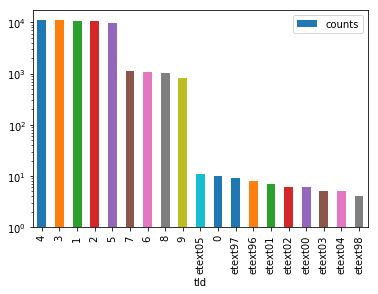

In [31]:
tld_counts.plot.bar('tld', 'counts', log='y')

### File Sizes

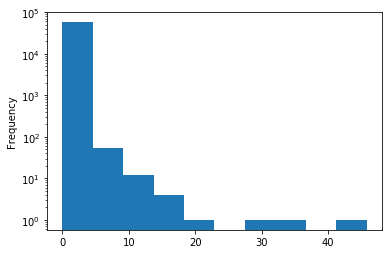

In [39]:
# Plot in MB
(df['size']/1e6).plot.hist(log='y')

In [62]:
df.groupby([pd.cut(df['size']/1e6, range(10))]).count()

cwd   name   size    tld
size                              
(0, 1]  54243  54243  54243  54243
(1, 2]   2826   2826   2826   2826
(2, 3]    260    260    260    260
(3, 4]     77     77     77     77
(4, 5]     33     33     33     33
(5, 6]     20     20     20     20
(6, 7]      8      8      8      8
(7, 8]      5      5      5      5
(8, 9]      5      5      5      5

(array([5.7424e+04, 5.3000e+01, 1.2000e+01, 4.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([2.03000000e+02, 4.57712260e+06, 9.15404220e+06, 1.37309618e+07,
        1.83078814e+07, 2.28848010e+07, 2.74617206e+07, 3.20386402e+07,
        3.66155598e+07, 4.11924794e+07, 4.57693990e+07]),
 <a list of 10 Patch objects>)

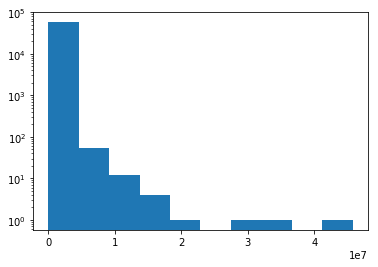

In [58]:
sizes = np.array([x['size'] for x in all_files])
plt.hist(sizes, log=True)

In [129]:
sorted(all_files, key=lambda f:f['size'], reverse=True)[:10]

[{'cwd': '/home/ec2-user/work/notebooks/gutenberg/../../data/gutenberg/data/6/7/673',
  'tld': '6',
  'name': '673.txt',
  'size': 45769399},
 {'cwd': '/home/ec2-user/work/notebooks/gutenberg/../../data/gutenberg/data/1/1/8/0/11800',
  'tld': '1',
  'name': '11800-8.txt',
  'size': 32703384},
 {'cwd': '/home/ec2-user/work/notebooks/gutenberg/../../data/gutenberg/data/2/9/7/6/29765',
  'tld': '2',
  'name': '29765-8.txt',
  'size': 28930476},
 {'cwd': '/home/ec2-user/work/notebooks/gutenberg/../../data/gutenberg/data/4/6/5/4656',
  'tld': '4',
  'name': '4656.txt',
  'size': 18797303},
 {'cwd': '/home/ec2-user/work/notebooks/gutenberg/../../data/gutenberg/data/3/2/0/3200',
  'tld': '3',
  'name': '3200.txt',
  'size': 16013958},
 {'cwd': '/home/ec2-user/work/notebooks/gutenberg/../../data/gutenberg/data/4/5/0/4500',
  'tld': '4',
  'name': '4500.txt',
  'size': 14957982},
 {'cwd': '/home/ec2-user/work/notebooks/gutenberg/../../data/gutenberg/data/2/4/1/8/24183',
  'tld': '2',
  'name': 